# Analisis de Tecnicas Basadas en Frecuencias de 10 canciones de Calle 13.

#### Cancion 1: Querido FBI
#### Cancion 2: El Aguante
#### Cancion 3: A Limpar El Sucio
#### Cancion 4: Ojos Color Sol
#### Cancion 5: No Hay Nadie Como Tú
#### Cancion 6: Guerra
#### Cancion 7: La Vida
#### Cancion 8: Digo Lo Que Pienso
#### Cancion 9: René
#### Cancion 10: Latinoamérica

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re


import pickle 
#import mglearn
import time

from string import punctuation
from nltk.tokenize import TweetTokenizer # doesn't split at apostrophes
import nltk
from nltk import Text
from nltk.tokenize import regexp_tokenize
from nltk.tokenize import word_tokenize  
from nltk.tokenize import sent_tokenize 
from nltk.corpus import stopwords
nltk.download('stopwords')

spanish_stopwords = stopwords.words('spanish')
non_words = list(punctuation)
non_words.extend(['¿', '¡'])
non_words.extend(map(str,range(10)))

from urllib.request import urlopen
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\57321\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Creacion de corpus propio
My_Stop_Words = set(stopwords.words('spanish'))
# Se adicionan stopwords
My_Stop_Words.update(['pa','an','par','nao','to','pode'])

In [3]:
Cancion1 = '''Esto es un mensaje...
De parte del residente 'e Calle 13...
Pa' to' el gobierno...
Y pa' to' los puertorriqueños...
Danny, métele ahí...

Queridos compatriotas...
Abogados, maestros, alcaldes, y chotas
Doctores, bichotes, bomberos, enfermeros
Contables, traqueteros, piragüeros, to' el mundo entero
Por mi madre que hoy me disfrazo de machetero
Y esta noche voy a ahorcar a diez marineros
Hoy tengo la mano aniquela' y a mano pela'
Les vo'a dar una pela pa' que vean que el gas pela
Nuestra bandera la han llena'o de meao
Murió desangra'o, mi gente, que murió desangra'o
Nunca arrodilla'o, lo van a tener que enterrar para'o
Con el machete al la'o
Que se activen La Perla, Lloren, Barbosa
Manuela, Caimito, Vista Hermosa
Covadonga, Camarones, Alturas, Torres Sabanas
Villa Esperanza, Sabana Abajo, Villa Fontana
Gladiolas, Villa Carolina, el pueblo de Trujillo
Las parcelas, San John, Monte Hatillo
Canales, San José, Río Grande, Luquillo
Puerta de Tierra, Santurce, Monasillo
Urbanizaciones, caseríos, el FBI se ha metido en un lío
Están jodidos, se jodio la Casa Blanca
Ahora voy a explotar con estilo
En el nombre de Filiberto Ojeda Ríos
Me tumbaron el pulmón derecho pero todavía respiro
Me voy a los tiros, pero todavía respiro
A los federales con piedras les tiro
Y si no hay piedras pues les tiro con güiro
Con lo que sea, tumbaron al hombre pero no a la idea
A to' los federales los escupo con diarrea
Me dan nausea, me dan asco
Yo se que estoy perdiendo los cascos
Por culpa de ustedes, jodios brutos
La Calle 13 esta de luto
(Con calma, Compi, hay que ser astuto!) ¡Cállate!
Fucking federales, gandules y guardias estatales
Que no hicieron na', con las manos cruzadas
Se quedaron mamándose un bicho
Fucking cabron gobierno que permite esto
Chorro 'e puercos, son todos unos insectos
Y por eso protesto
Protesto por una masacre en Ponce
Protesto por un Cerro Maravilla
Y hasta por un septiembre 11

(Lucha, lucha!)
(Como lucha libre!)
(Por la libre, viva Puerto Rico libre!)
(Hay mucho tiburón en el Caribe!)
(100 x 35 es el calibre!)
(Lucha, lucha!)
(Como lucha libre!)
(Por la libre, viva Puerto Rico libre!)
(Hay mucho tiburón en el Caribe!)
(100 x 35 es el calibre!)

Pa' explotar a esos cabrones los colmillos
Hay 3.9 millones de cuchillos
Esto es sencillo, se me prendió el bombillo
Lo que hay es que activar a los corillos
En vez de apuntar pa' los mismos caseríos
Apuntar pa' arriba, pa' donde hace frío
Pa' los del Norte, sin cojones la radio y las ventas
White Lion me dio el pasaporte pa' tirar este corte

(Lucha, lucha!)
(Como lucha libre!)
(Por la libre, viva Puerto Rico libre!)
(Hay mucho tiburón en el Caribe!)
(100 x 35 es el calibre!)
(Lucha, lucha!)
(Como lucha libre!)
(Por la libre, viva Puerto Rico libre!)
(Hay mucho tiburón en el Caribe!)
(100 x 35 es el calibre!)

Este fue el residente 'e Calle 13!
Acuérdense de mi nombre!
Porque lo van a tener en las carpetas!
Con to' el peso de la calle!
Les va a caer la Calle 13 completa!
Pa' que respeten!
Aquí se respeta o se te espeta!
Se respeta o se te espeta!
Se respeta o se te espeta, puñeta!'''

In [4]:
Cancion2 = '''Nacimos para aguantar lo que el cuerpo sostiene
Aguantamos lo que vino y aguantamos lo que viene
Aguantamos aunque tengamos los segundos contados
Nuestro cuerpo aguanta hasta quince minutos ahorcado
Aguantamos latigazos, que nos corten los dos brazos
Fracturas en cualquier hueso, tres semanas con un yeso

Aguantamos todo el tiempo las ganas de ir al baño
Pa' ver el cometa halley hay que aguantar setenta años
Aguantamos la escuela, la facultad, el instituto
A la hora de cenar, nos aguantamos los eructos
El pueblo de burundi sigue aguantando la hambruna
Aguantamos tres días para llegar a la luna

Aguantamos el frío del ártico, el calor del trópico
Aguantamos con anticuerpos los virus microscópicos
Aguantamos las tormentas, los huracanes, el mal clima
Aguantamos nagasaky, aguantamos hiroshima
Aunque no queramos, aguantamos nuevas leyes
Aguantamos hoy por hoy que todavía existan reyes
Castigamos al humilde y aguntamos al cruel
Aguantamos ser esclavos por nuestro color de piel
Aguantamos el capitalismo, el comunismo, el socialismo, el feudalismo
Aguantamos hasta el pendejismo
Aguantamos al culpable cuando se hace el inocente
Aguantamos cada año a nuestro pu* presidente

Por lo que fue y por lo que pudo ser
Por lo que hay, por lo que puede faltar
Por lo que venga y por este instante
A brindar por el aguante

Por lo que fue y por lo que pudo ser
Por lo que hay, por lo que puede faltar
Por lo que venga y por este instante
Levanta el vaso y a brindar por el aguante
¡A brindar por el aguante

Aguantamos cualquier tipo de dolor aunque nos duela
Aguantamos pinochet, aguantamos a videla
A franco, mao, ríos montt, mugabe
Hitler, idi amin, stalin, bush, truman, ariel sharón y hussein
Aguantamos más de veinte campos de concentración
Cuando nadas bajo el agua, aguantas la respiración
Pa' construir una pared, aguantamos los ladrillos
El que no fuma se aguanta el olor a cigarrillo
Aguantamos que monsanto infecte nuestra comida
Aguantamos el agente naranja y los pesticidas

Cuando navegamos aguantamos el mareo
Aguantamos el salario mínimo y el desempleo
Aguantamos las malvinas y la invasión británica en la ciudad de pompeya
Aguantamos lava volcánica y dentro de la lógica
De nuestra humanidad, nos creemos la mentira y nadie aguanta la verdad

Por lo que fue y por lo que pudo ser
Por lo que hay, por lo que puede faltar
Por lo que venga y por este instante
Levanta el vaso y a brindar por el aguante
¡A brindar por el aguante!

Aguantamos al ateo, al mormón, al cristiano
Al budista, al judío
Aguantamos al pagano
Aguantamos el que vende balas y el que la dispara
Aguantamos la muerte de lennon, la de víctor jara
Aguantamos muchas guerras, Vietnam, la guerra fría
La guerra de los cien años, la guerra de los seis días

¡Que aguanten la revancha, venimos al desquite
Hoy nuestro hígado aguanta lo que la barra invite

Por lo que fue y por lo que pudo ser
Por lo que hay, por lo que puede faltar
Por lo que venga y por este instante
A brindar por el aguante

Por lo que fue y por lo que pudo ser
Por lo que hay, por lo que puede faltar
Por lo que venga y por este instante
Levanta el vaso y a brindar por el aguante
¡A brindar por el aguante'''

In [5]:
Cancion3 = '''Ahora voy... a limpiar el sucio difícil donde estoy
Mira quien soy residente calle 13 sit back, relax and enjoy

Ok to el mundo vamos a hacer una fila
El que me quiera tirar que enseñe las axilas
Levanten los brazos
Hey! sin darse codazos
Agarren una piedra y tirenme un pedrazo
Y sigan el rastro de mi leche
Porque con esto de la calle 13
Me he clavadu como a 500 gevas en 2 meses
Flacas, gordas, enanas, gemelas. Siameses
Si todavía el residente a usted no lo convence
Es por que usted tiene la cabeza cerra´, cuadra´ como un cubo
O puede ser que tiene un tubo atravezau pol culo... uhh!
O puede ser que tu cerebro no esta preparau pa tanto jugo
Como quiera te lo empujo
Sin echarte fufu´ magia negra
Sin echarte brujo como quiera te lo empujo pol culo
Saquen el embudo... uhhh!
Erecto por el recto néctar directo inyecto
Tu cerebro apesto con el puñetero dialecto
Yo detesto a los insectos
Y con swing perfecto al hígado conecto
Yo se que te jode escucharme a diario
Y esque no es un hit nada mas son varios
Cada vez que me escuchas en la radio
Te jodo más que un barro en el labio
No es mi culpa que yo tenga mas vocabulario
Yo te pase el rolo
Roller roller blade
Tu escuchando rap yo Poisson y White Snake
Y con to y eso la mate de una en mi primer brake
What you gonna, what you gonna what you gonna SAY?
Pa los que están cabeceando aquí les traigo Bengay
El genero esta atrasau tiene un delay
Por eso ser el rey en este field day es un mamey

Aquí tengo tu plan de retiro
Cómprate una 9 milímetros y pégate un tiro en la boca
Pa que se salga toa la sopa de tus sesos pa afuera
Vamos a manchar la primavera!..
Con sangre de ternera pol ser tan mala fucking reportera
Tus reportajes son diarrea
Por eso estas soltera sin novio.. aww
Es obvio que tu pa mi eres un microbio
Te voy a dar un consejo
¿Porque no vas a Sábado Gigante a morirte con los viejos
Con el panty meao a derretirte en la silla con to y pellejo
Y que con tu muerte se derritan tus complejos
Yo se que voy pal infierno
Pero voy contigo
Y haya abajo te voy a dar pa abajo te voy a dar castigo
Por que a mi también me gustan las viejas
Así medio pendejas sin talento
Con un 0% de inteligentes pensamientos
Culpables del embrutecimiento
Causado por comentarios hechos sin base y fundamento
Esta canción esta llegando al borde del aburrimiento
Así que visitante suelta el coro pa que se lo lleve el viento

Esta es la única vez que vas a ser famosa
Este es tu momento disfrútalo
Ah y sal del closet tu mai no merece eso
Habla claro, sal del closet
Aunque no parezca te quiero mucho (beso)
Un besito (beso)x2 viejita un besito a lo viejita (Besitos)'''

In [6]:
Cancion4 = '''Hoy el Sol se escondió y no quiso salir
Te vio despertar y le dio miedo de morir
Abriste los ojos y el Sol guardó su pincel
Porque tú pintas el paisaje mejor que él

Cuando amanece, tu lindura
Cualquier constelación se pone insegura
Tu belleza huele a mañana
Y me da de comer durante toda la semana

Tus ojos hacen magia, son magos, los abriste
Y ahora se reflejan las montañas en los lagos
La única verdad absoluta
Es que cuando naciste tú
A los arboles le nacieron frutas

Naranja dulce, siembra de querube
Como el Sol tenía miedo se escondió en una nube
Hoy el Sol no hace falta está en receso
La vitamina d, me la das tú con un beso

La Luna sale a caminar siguiendo tus pupilas
La noche brilla original después que tú la miras
Ya nadie sabe ser feliz a costa del despojo
Gracias a ti y a tus ojos

Eres un verso en reversa, un riverso
Despertaste y le diste vuelta a mi universo
Ahora se llega a la cima, bajando por la sierra
La tierra ya no gira, tú giras por la tierra
En la guerra se dan besos, ya no se pelean
Hoy las gallinas mugen y las vacas cacarean
Las lombrices y los peces pescan los anzuelos
Se vuela por el mar y se navega por el cielo

Crecen flores en la arena, cae lluvia en el desierto
Ahora los sueños son reales, porque se sueña despierto
Y ese sueño es seguro y así se reproduce
Y la inocencia por fin no se esconde de las luces
La escasez de comida se vuelve deliciosa
Porque tenemos la barriga llena de mariposas
La galaxia revela su comarca escondida
Y en la tierra parece que comienza la vida

La Luna sale a caminar siguiendo tus pupilas
La noche brilla original después que tú la miras
Ya nadie sabe ser feliz a costa del despojo
Gracias a ti y a tus ojos

En la academia militar enseñan medicina
Y los banqueros ahora dan viviendas y comidas
Ya nadie sabe ser feliz a costa del despojo
Gracias a ti y a tus ojos'''

In [7]:
Cancion5 = '''En el mundo hay gente bruta y astuta
Hay vírgenes y prostitutas
Ricos pobres clase media
Cosas bonitas y un par de tragedias

Hay personas gordas medianas y flacas
Caballos, gallinas, ovejas y vacas
Hay muchos animales con mucha gente
Personas cuerdas y locos de mente

En el mundo hay mentiras y falsedades
Hechos, verdades y casualidades
Hay mentalidades horizontales
Verticales y diagonales

Derrotas y fracasos accidentales
Medallas, trofeos y copas mundiales
En el mundo hay vitaminas y proteínas
Marihuana, éxtasis y cocaína

Hay árboles, ramas, hojas y flores
Hay muchas montañas de colores
En el mundo hay decisiones divididas
Entradas, salidas, debut, despedidas

Hay inocentes, hay homicidas
Hay muchas bocas, y poca comida
Hay gobernantes y presidentes
Hay agua fría y agua caliente

En el mundo hay micrófonos
Y alto parlantes
Hay seis mil millones de habitantes
Hay gente ordinaria y gente elegante
Pero pero pero

No hay nadie como tú
No hay nadie como tú mi amor
No hay nadie como tú
No hay nadie como tú
No hay nadie como tú mi amor
No hay nadie como tú

En el mundo siempre se mueve la tierra
Hay tanques de oxigeno y tanques de guerra
Si el Sol y la Luna nos dan energía
Se duerme de noche, y se vive de día

Hay gente que rectifica lo que dice
Hay mucha gente que se contradice
Hay algarrobas y algas marinas
Hay vegetarianos y carnicerías

Hay tragos amargos y golosinas
Hay enfermedades y medicinas
Hay bolsillos llenos, carteras vacías
Hay más ladrones que policías

Hay religiones, hay ateísmo
Hay capitalismo, y comunismo
Aunque nos parecemos no somos los mismos
Porque porque

No hay nadie como tu
No hay nadie como tu mi amor
No hay nadie como tu
Como tu
No hay nadie como tu
No hay nadie como tu mi amor
No hay nadie como tu
Como tu

En el mundo existen muy buenas ideas
Hay don quijotes y dulcineas
Hay sexo en el baño, sexo en la cama
Sexo sin ropa, sexo en pijama

Hay cosas reales y melodramas
Hay laberintos y crucigramas
Existen llamadas que nadie contesta
Hay muchas preguntas y pocas respuestas

Hay gente valiente, gente con miedo
Gente que el mundo no le importa un bledo
Gente parada, gente sentada
Gente soñando y gente despertando

Hay gente que nace, gente que muere
Hay gente que odia, y gente que quiere
En este mundo hay mucha gente
Pero pero pero

No hay nadie como tú
No hay nadie como tú mi amor
No hay nadie como tú'''

In [8]:
Cancion6 = '''Yo te miro y mi rabia te toca
Cuando grito sin usar la boca
Y mi furia se come a la gente
Porque muerde aunque no tenga dientes

El dolor no me causa problema
Hoy los dolores recitan poemas
El mundo me lo como sin plato
El miedo a mí me limpia los zapatos

El fuego lo derretí
Hoy las pesadillas no duermen
Porque piensan en mí
Hoy puedo ver lo que el otro no vio
Y los pongo a rezar aunque no crean en dios

Hoy las lagrimas lloran antes morir
Y a los libros de historia los pongo a escribir
Que le tiemblen las piernas al planeta tierra
Hoy yo vine a ganar
Y estoy hecho de guerra
(Hecho de guerra)
(Y estoy hecho de guerra)
(Y estoy hecho de guerra)
(Y estoy hecho de guerra)
(Los pongo a rezar)

Soy el boquete
Que dejó la bomba que cayó
Lo que fecundó la madre que me parió
Desde que nací soy parte de este menú
Porque yo llegué al ovulo antes que tú

Soy la selva que corre descalza
En el medio del mar sobrevivo sin balsa
Soy el caudal que mueve la corriente
Los batallones que chocan de frente
Mis rivales que vengan de a dos
Hoy, ni siquiera los truenos me alzan la voz

Soy tu derrota, tus dos piernas rotas
El clavo en el pie que traspasó la bota
Soy la estrategia de cualquier combate
Hoy se gana o se pierde
No existe el empate
Soy las penas de tus alegrías
La guerra de noche y la guerra de día
(Guerra de noche y la guerra de día)
(Guerra de noche y la guerra de día)
(Guerra de noche y la guerra de día)
(Guerra de noche y la guerra de día)
(Los pongo a rezar)

La guerra la mato sin darle un balazo
A la guerra le da miedo los abrazos
La guerra con camuflaje se viste
Así nadie ve cuando se pone triste

La guerra pierde todas sus luchas
Cuando los enemigos se escuchan
La guerra es más débil que fuerte
No aguanta la vida por eso se esconde en la muerte'''

In [9]:
Cancion7 = '''Uno nace mientras el planeta gira
Los pulmones abren la nariz respira
Escuchamos al mundo con todo su alboroto
Los parpados suben y los ojos tiran fotos
Si salimos de la cuna para dormir en la cama
Nos crecen los brazos como crecen las ramas
Como crecen las hojas nos crecen las manos
Como crecen los días cuando madruga temprano

Los segundos los minutos y las horas
Germinan así como los días empiezan y terminan
Los meses se disfrazan según el meridiano
Otoño invierno primavera verano

Y se ajusta el camino a nuestros pasos
Así como el agua se adapta a su vaso
Nuestro corazón se aclimata a la altura
Y nos adaptamos a cualquier aventura

Pueden sumar con prisa pueden restar con calma
Da igual porque las matemáticas no tienen alma
Aunque calculemos todo y le pongamos nombre propio
Nuestro espíritu no lo pueden ver los microscopios
Nadie se puede acobardar nacimos siendo valientes

Porque respirar es arriesgar
Este es el momento de agarrar el impulso
Las emociones las narra nuestro pulso

Respira el momento
Respira el momento

En nuestra galaxia la historia se expande
Desde lo más simple hasta lo más grande

Crecimos junto a los cuerpos celestes
Somos el norte sur este y oeste
Somos la tierra con todas sus huellas
Una súper nova entre todas las estrellas

Absorbemos la luz de los rayos
Mientras la clorofila navega por los tallos
Los grados y centígrados calientan los termómetros
A 150 millones de kilómetros
Hay una vía láctea repleta de neuronas
Porque reproducimos mas ideas que personas
No somos pequeños ni muy grandes tampoco
Somos muchos y también somos pocos
Somos el golpe cuando aterriza
Y también somos la piel cuando cicatriza

La muerte nunca nos venció
Porque todo lo que muere
Es por que alguna vez nació

Lengua, beso, boca, labio, niño, joven, viejo, sabio
Calvo, rizo, pelo lacio, techo, casa, cielo, espacio
Sexo, orgasmo se humedece
Quizás nunca siempre a veces
Libro letra cuento narra ron con hielo o trago barra
3 Millones de latidos en un periodo mensual
Caminamos dando 10 mil pasos en un día normal
Crudo, hervido, asado, frito, guerra, iglesia, rezo, grito
Muy poquito demasiado, corro, vuelo, salto, nado
Puede llegar algún día el colmo de la biología
Vivir con sangre caliente pa' morir a sangre fría

Respira el momento
Respira el momento

En nuestra galaxia la historia se expande
Desde lo más simple hasta lo más grande'''

In [10]:
Cancion8 = '''Siempre digo lo que pienso
No quiero ser tu artista favorito
Tampoco me interesa representar a Puerto Rico
Pa representar a mi país están los deportistas
Lo mío es soltar la lengua y que resbale por la pista
Tengo del respeto que no se compra con plata
Soy un tipo decente sin tener que usar corbata
Rimando con franqueza soy todo un académico
Soy mas polémico Que michael Jackson y su médico
Siempre digo lo que pienso
Mis letras groseras son mas educadas que tu silencio
Se equivocaron un par de novatos en la escena
Pero se disculparon no hay ningun problema
Tirar con indirectas, eso no es Cosa de hombres
El que me tire a mi tiene que mencionar mi nombre
Y cuando me mencionan rimando estupideces
Los pongo a caminar en faldas como los escoceses
Con un buen manejo del vocablo
Rimando Hay pocos caballos en el establo
Diablo.. La envidia los bloquea
Tuvo que venir un rockero a darles clases de cómo se rapea

Siempre digo lo que pienso
Aquí no hay armas.. Yo me la juego inteligente
Siempre digo lo que pienso
Con dos palabras puedo tumbarte un par de dientes
Siempre digo lo que pienso
Cuando quiero decir algo lo digo de frente
Siempre digo lo que pienso
Dejar de hablar no combina con gente valiente
Baterista de pequeño, rapero cuando adulto
Por eso riman a tiempo todos mis insultos
A las mentalidades prehistóricas
Las capturo con groserías Luego las mato con retórica
Los problemas no se dan por sentado
Y mas cuando hay abusos de parte del estado
Sería muy fácil para mi escribir un bolero
O hacer un video rapeando encima de un velero
Con mujeres en pelotas acariciándome las huevos
Sacrificar mis ideales pa venderte un disco nuevo
Si es así mejor me quedo
No se puede escribir sobre el dolor cuando se escribe con miedo
Conformarse y dejar de insistir
Es como ver a alguien ahogándose y dejarlo morir
No importa si me escucha una sola persona por esta vez
Cuando conecto a uno conecto a diez
Que importa si no sueno en las radios de mi pais
Tengo al mundo dando vueltas con las letras que escribí
Me censuraron por razones obvias
Por que fui mas honesto con ustedes que lo que fui con mi ex novia
Yo soy el que te recuerda como estamos de jodidos
Y Que todos tus problemas pueden ser como los míos
Yo soy todo lo que tu escondes
Soy el que esta pa ti, dime como cuando y donde

Siempre digo lo que pienso
Aquí no hay armas.. Yo me la juego inteligente
Siempre digo lo que pienso
Con dos palabras puedo tumbarte un par de dientes
Siempre digo lo que pienso
Cuando quiero decir algo lo digo de frente
Siempre digo lo que pienso
Dejar de hablar no combina con gente valiente
Hoy te va conocer el mundo entero
Te voy a hacer famoso pero por periquero
Alcalde drogadicto con cara de idiota
Ganarme esos Grammys fue como venirme en tu boca
Eres corrupto, tu lo sabes, yo no me chupo el dedo
Tienes cara de narcotraficante con miedo
Con el dinero de las regalías de esta canción
Te prometo que te llevo a Cuba y te pago la rehabilitación
No me vengas a manenazar con la CIA
Yo también tengo amigos policías
Amigos en mexico, Colombia y Venezuela
Cuba, Argentina, y hablo con ellos to los días
Tengo amigos que te han visto capeando
El perico, la coca, hueliendo, olfateando
Pa que no digan que esto es un montaje
Yo te invito a hacernos la prueba de dopaje'''

In [11]:
Cancion9 = '''René, ven, vamo' a estudiar
Sí, te voy a hacer una pregunta
Tú me la contesta'
¿Con qué parte del cuerpo
Jugaban pelota los indios taíno'?
René, contéstame
Sí, es fácil
Atiéndeme, atiéndeme, mírame
¿Con qué parte del cuerpo?, piensa
¿Jugaban pelota los indios taíno'?
Ya sé
Te la canto y entonce' así tú te la vas aprendiendo

Cabeza, rodilla, muslos y cadera
Cabeza, rodilla, muslos y cadera
Cabeza, rodilla, muslos y cadera
Cabeza, rodilla, muslos y

Desde pequeño quería ser beisbolista, no llegué
Así que aprendí a batear hits por encima de una pista
Volví a tomar alcohol en mi despacho
Escribo bien sobrio, pero escribo mejor borracho

Cuando caigo en depresión
Mis problemas se los cuento a la ventana del avión
El estrés me tiene enfermo
Hace diez años que no duermo

El IRS me sigue investigando, me estoy divorciando
Pero no importa, yo sigo rimando
Comento errores, pero hago lo que pueda
Aprendí a aterrizar sin ruedas

Y aunque en la calle me reconocen
Ya ni mis amigos me conocen
Estoy triste y me río
El concierto está lleno, pero yo estoy vacío

En la industria de la música, todo es mentira
Mi hijo tiene que comer, así que sigo de gira
Solo me queda lo que tengo
No sé pa' dónde voy, pero sé de dónde vengo

Me crié con Christopher, mi pana
Tiramos piedras juntos, rompimo' un par de ventana'
Corríamos por la calle sin camiseta
En las parcela' de Trujillo, cuesta abajo, en bicicleta

La bici encima del barro
Con un vaso de plástico en la goma
Pa' que suene como un carro
Recargábamos batería con malta india
Y pan con ajo, nadie nos detenía

Éramos inseparables, hasta que un día
Lo mataron entre cuatro policías
Mi alegría sigue rota
Se apagaron las luces en el Parque de Pelotas

Ya no queda casi nadie aquí
A veces ya no quiero estar aquí
Me siento solo aquí
En el medio de la fiesta
Quiero estar en donde nadie me molesta
Quemar mi libreta, soltar mis maletas
Quiero llamar al 7-5-5-0-8-2-2
A ver quién contesta

Las peleas con mi padrastro, cuando perdía el control
Las resolvía con él, viendo un partido de béisbol
Me invitó a pelear un par de veces
Me escapé de casa un par de veces

Pero nunca faltó el alimento
Nos defendió con música, tocando en casamientos
A veces al horno, a veces de lata y microondas
Compartíamos todo, la mesa era redonda

Clase media-baja, nunca fuimos dueños
El préstamo del banco se robaba nuestros sueños
La cuenta de ahorro vacía
Pero mami bailando flamenco nos alegraba el día

Dejó de actuar pa' cuidarnos a los cuatro
Y nos convertimos en su obra de teatro
Ella se puso nuestras botas
Y su vida fue de nuestros logros y nuestras derrotas

Mi padrastro se fue con otros peces
Nos mudamos de la Calle 13
Me fui a buscar la suerte en un mar de paja'
Y mi vida entera la empaqué en una caja

En la universidad de arte', me becaron
A la mitad de mis amigo' los mataron
Empecé a rapear de nuevo
Empecé a creer de nuevo

Volví, saqué un disco
Me comí el mundo de un mordisco
En Puerto Rico, despidieron empleados
Insulté al gobernador y quedó televisado

Censuraron cuatro años de mi calendario
Abuela murió, no me vio tocar en el estadio
Dije to' lo que sentí
Me quieren más afuera que en mi propio país

Pero aunque mis canciones las cante un alemán
Quiero que me entierren en el viejo San Juan
Puede que la tristeza la disimule
Pero estoy hecho de arroz con gandules

Y me duele
No importa que el ron de la madrugada me consuele
Y desde adentro de la pulpa, si la cagué
A mi país le dedico cuatro piso' de disculpa'

Ya no queda casi nadie aquí
A veces ya no quiero estar aquí
Me siento solo aquí
En el medio de la fiesta
Quiero estar en donde nadie me molesta
Quemar mi libreta, soltar mis maletas
Quiero llamar al 7-5-5-0-8-2-2
A ver quién contesta

Y si me contestan
Quiero decirles que quiero volver
Que quiero salir de este hotel
Y desaparecer

Y si me contestan
Quiero decirles que quiero bajar el telón
Que a veces me sube la presión
Que tengo miedo que se caiga el avión

Que no me importan las gira', los disco', los Grammy
Y que en la Calle 11
Quiero volver a ver El Cometa Halley con mami
Quiero volver a cuando

Mis ventana' eran de Sol
Y me despertaba el calor
A cuando me llamaban pa' jugar
A cuando rapeaba sin cobrar

Quiero sacar las cartas de pelotas del envase
Volver a robarme segunda base
En verano, hay navidades
Limpiar la casa con mis hermano', escuchando a Rubén Blades

Quiero volver, ir al cine en la semana
Y llegar a la escuela de arte' en la' mañana'
Quiero quedarme allí, no quiero salir de allí
Quiero volver a cuando

No me dejaban entrar porque me vestía mal
Quiero volver a sentir
A cuando no tenía que fingir
Yo quiero volver a ser yo

Cabeza, rodilla, muslos y cadera
Cabeza, rodilla, muslos y cadera
Cabeza, rodilla, muslos y cadera
Cabeza, rodilla, muslos y cadera

Cabeza, rodilla, muslos y cadera
Cabeza, rodilla, muslos y cadera
Cabeza, rodilla, muslos y cadera
Cabeza, rodilla, muslos y cadera'''

In [12]:
Cancion10 = '''Soy, soy lo que dejaron
Soy toda la sobra de lo que se robaron
Un pueblo escondido en la cima
Mi piel es de cuero, por eso aguanta cualquier clima
Soy una fábrica de humo
Mano de obra campesina para tu consumo

Frente de frío en el medio del verano
El amor en los tiempos del cólera, ¡mi hermano!
Soy el Sol que nace y el día que muere
Con los mejores atardeceres
Soy el desarrollo en carne viva
Un discurso político sin saliva
Las caras más bonitas que he conocido

Soy la fotografía de un desaparecido
La sangre dentro de tus venas
Soy un pedazo de tierra que vale la pena
Una canasta con frijoles, soy Maradona contra Inglaterra
Anotándote dos goles

Soy lo que sostiene mi bandera
La espina dorsal del planeta, es mi cordillera
Soy lo que me enseñó mi padre
El que no quiere a su patría, no quiere a su madre
Soy América Latina, un pueblo sin piernas, pero que camina
¡Oye!

Tú no puedes comprar el viento
Tú no puedes comprar el Sol
Tú no puedes comprar la lluvia
Tú no puedes comprar el calor

Tú no puedes comprar las nubes
Tú no puedes comprar los colores
Tú no puedes comprar mi alegría
Tú no puedes comprar mis dolores

Tú no puedes comprar el viento
Tú no puedes comprar el Sol
Tú no puedes comprar la lluvia
Tú no puedes comprar el calor

Tú no puedes comprar las nubes
Tú no puedes comprar los colores
Tú no puedes comprar mi alegría
Tú no puedes comprar mis dolores

Tengo los lagos, tengo los ríos
Tengo mis dientes pa' cuando me sonrio
La nieve que maquilla mis montañas
Tengo el Sol que me seca y la lluvia que me baña
Un desierto embriagado con peyote
Un trago de pulque para cantar con los coyotes
Todo lo que necesito, tengo a mis pulmones respirando azul clarito

La altura que sofoca
Soy las muelas de mi boca, mascando coca
El otoño con sus hojas desmayadas
Los versos escritos bajo la noche estrellada
Una viña repleta de uvas
Un cañaveral bajo el Sol en Cuba
Soy el mar Caribe que vigila las casitas

Haciendo rituales de agua bendita
El viento que peina mi cabellos
Soy, todos los santos que cuelgan de mi cuello
El jugo de mi lucha no es artificial
Porque el abono de mi tierra es natural

Tú no puedes comprar el viento
Tú no puedes comprar el Sol
Tú no puedes comprar la lluvia
Tú no puedes comprar el calor

Tú no puedes comprar las nubes
Tú no puedes comprar los colores
Tú no puedes comprar mi alegría
Tú no puedes comprar mis dolores

Não se pode comprar o vento
Não se pode comprar o Sol
Não se pode comprar a chuva
Não se pode comprar o calor
Não se pode comprar as nuvens
Não se pode comprar as cores
Não se pode comprar minha'legria
Não se pode comprar minhas dores

No puedes comprar el Sol
No puedes comprar la lluvia
(Vamos caminando)
No riso e no amor
(Vamos caminando)
No pranto e na dor
(Vamos dibujando el camino)
No puedes comprar mi vida
(Vamos caminando)
La tierra no se vende

Trabajo bruto, pero con orgullo
Aquí se comparte, lo mío es tuyo
Este pueblo no se ahoga con marullo
Y si se derrumba yo lo reconstruyo
Tampoco pestañeo cuando te miro
Para que te recuerde de mi apellido
La operación Condor invadiendo mi nido
Perdono pero nunca olvido
¡Oye!

Vamos caminando
Aquí se respira lucha
Vamos caminando
Yo canto porque se escucha
Vamos dibujando el camino
(Vozes de um só coração)
Vamos caminando
Aquí estamos de pie
¡Que viva la América!
No puedes comprar mi vida'''

In [13]:
Total_Canciones = Cancion1 + Cancion2 + Cancion3 + Cancion4 + Cancion5 + Cancion6 + Cancion7 + Cancion8 + Cancion9 + Cancion10
Total_Canciones

"Esto es un mensaje...\nDe parte del residente 'e Calle 13...\nPa' to' el gobierno...\nY pa' to' los puertorriqueños...\nDanny, métele ahí...\n\nQueridos compatriotas...\nAbogados, maestros, alcaldes, y chotas\nDoctores, bichotes, bomberos, enfermeros\nContables, traqueteros, piragüeros, to' el mundo entero\nPor mi madre que hoy me disfrazo de machetero\nY esta noche voy a ahorcar a diez marineros\nHoy tengo la mano aniquela' y a mano pela'\nLes vo'a dar una pela pa' que vean que el gas pela\nNuestra bandera la han llena'o de meao\nMurió desangra'o, mi gente, que murió desangra'o\nNunca arrodilla'o, lo van a tener que enterrar para'o\nCon el machete al la'o\nQue se activen La Perla, Lloren, Barbosa\nManuela, Caimito, Vista Hermosa\nCovadonga, Camarones, Alturas, Torres Sabanas\nVilla Esperanza, Sabana Abajo, Villa Fontana\nGladiolas, Villa Carolina, el pueblo de Trujillo\nLas parcelas, San John, Monte Hatillo\nCanales, San José, Río Grande, Luquillo\nPuerta de Tierra, Santurce, Monasil

In [14]:
from unicodedata import normalize
Total_Canciones = re.sub(r"([^n\u0300-\u036f]|n(?!\u0303(?![\u0300-\u036f])))[\u0300-\u036f]+", r"\1", 
        normalize( "NFD", Total_Canciones), 0, re.I)
Total_Canciones = re.sub(r"[,.''!?¿¡)0-9(-]+","",Total_Canciones)
Total_Canciones = Total_Canciones.replace('\n\n','\n')
Total_Canciones = Total_Canciones.lower()
Total_Canciones1 = Total_Canciones
Total_Canciones

'esto es un mensaje\nde parte del residente e calle \npa to el gobierno\ny pa to los puertorriqueños\ndanny metele ahi\nqueridos compatriotas\nabogados maestros alcaldes y chotas\ndoctores bichotes bomberos enfermeros\ncontables traqueteros piragueros to el mundo entero\npor mi madre que hoy me disfrazo de machetero\ny esta noche voy a ahorcar a diez marineros\nhoy tengo la mano aniquela y a mano pela\nles voa dar una pela pa que vean que el gas pela\nnuestra bandera la han llenao de meao\nmurio desangrao mi gente que murio desangrao\nnunca arrodillao lo van a tener que enterrar parao\ncon el machete al lao\nque se activen la perla lloren barbosa\nmanuela caimito vista hermosa\ncovadonga camarones alturas torres sabanas\nvilla esperanza sabana abajo villa fontana\ngladiolas villa carolina el pueblo de trujillo\nlas parcelas san john monte hatillo\ncanales san jose rio grande luquillo\npuerta de tierra santurce monasillo\nurbanizaciones caserios el fbi se ha metido en un lio\nestan jod

In [15]:
#Total_Canciones = Total_Canciones.replace('\n\n','\n')
Total_Canciones = Total_Canciones.split('\n')
Total_Canciones

['esto es un mensaje',
 'de parte del residente e calle ',
 'pa to el gobierno',
 'y pa to los puertorriqueños',
 'danny metele ahi',
 'queridos compatriotas',
 'abogados maestros alcaldes y chotas',
 'doctores bichotes bomberos enfermeros',
 'contables traqueteros piragueros to el mundo entero',
 'por mi madre que hoy me disfrazo de machetero',
 'y esta noche voy a ahorcar a diez marineros',
 'hoy tengo la mano aniquela y a mano pela',
 'les voa dar una pela pa que vean que el gas pela',
 'nuestra bandera la han llenao de meao',
 'murio desangrao mi gente que murio desangrao',
 'nunca arrodillao lo van a tener que enterrar parao',
 'con el machete al lao',
 'que se activen la perla lloren barbosa',
 'manuela caimito vista hermosa',
 'covadonga camarones alturas torres sabanas',
 'villa esperanza sabana abajo villa fontana',
 'gladiolas villa carolina el pueblo de trujillo',
 'las parcelas san john monte hatillo',
 'canales san jose rio grande luquillo',
 'puerta de tierra santurce mo

In [16]:
#Total_Canciones=[Total_Canciones]

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
#Contar_Vec = CountVectorizer(stop_words=spanish_stopwords, analyzer='word', ngram_range=(1, 1), max_df=1.0, min_df=1,
#                             lowercase=True, max_features=None)

Contar_Vec = CountVectorizer(stop_words=My_Stop_Words, analyzer='word', ngram_range=(1, 1), max_df=1.0, min_df=1,
                            lowercase=True, max_features=None)

In [19]:
Contar_Vec

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None,
                stop_words={'a', 'al', 'algo', 'algunas', 'algunos', 'an',
                            'ante', 'antes', 'como', 'con', 'contra', 'cual',
                            'cuando', 'de', 'del', 'desde', 'donde', 'durante',
                            'e', 'el', 'ella', 'ellas', 'ellos', 'en', 'entre',
                            'era', 'erais', 'eran', 'eras', 'eres', ...},
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [20]:
bag_of_words1 = Contar_Vec.fit_transform(Total_Canciones)

In [21]:
print("Todas las palabras:\n{}".format(Contar_Vec.get_feature_names()))

Todas las palabras:
['abajo', 'abogados', 'abono', 'abrazos', 'abren', 'abriste', 'absoluta', 'absorbemos', 'abuela', 'aburrimiento', 'abusos', 'academia', 'academico', 'acariciandome', 'accidentales', 'aclimata', 'acobardar', 'activar', 'activen', 'actuar', 'acuerdense', 'adapta', 'adaptamos', 'adentro', 'adulto', 'afuera', 'agarrar', 'agarren', 'agente', 'agua', 'aguanta', 'aguantamos', 'aguantando', 'aguantar', 'aguantas', 'aguante', 'aguanteahora', 'aguanten', 'aguntamos', 'ah', 'ahi', 'ahoga', 'ahogandose', 'ahora', 'ahorcado', 'ahorcar', 'ahorro', 'ajo', 'ajusta', 'alboroto', 'alcalde', 'alcaldes', 'alcohol', 'alegraba', 'alegria', 'alegrias', 'aleman', 'algarrobas', 'algas', 'alguien', 'algun', 'alguna', 'alimento', 'alli', 'alma', 'alto', 'altura', 'alturas', 'alzan', 'amanece', 'amargos', 'america', 'amigo', 'amigos', 'amin', 'amor', 'ana', 'and', 'ando', 'animales', 'aniquela', 'anotandote', 'anticuerpos', 'anzuelos', 'apagaron', 'apellido', 'apesto', 'aprendi', 'aprendiendo'

In [22]:
Contar_Train = Contar_Vec.fit(Total_Canciones)

In [23]:
print("Tamaño del vocabulario: {}".format(len(Contar_Train.vocabulary_)))
print("Asignación en la matriz:\n {}".format(Contar_Train.vocabulary_))

Tamaño del vocabulario: 1541
Asignación en la matriz:
 {'mensaje': 912, 'parte': 1067, 'residente': 1242, 'calle': 219, 'gobierno': 665, 'puertorriquen': 1178, 'danny': 409, 'metele': 923, 'ahi': 40, 'queridos': 1195, 'compatriotas': 323, 'abogados': 1, 'maestros': 861, 'alcaldes': 51, 'chotas': 277, 'doctores': 496, 'bichotes': 158, 'bomberos': 173, 'enfermeros': 533, 'contables': 344, 'traqueteros': 1422, 'piragueros': 1122, 'mundo': 975, 'entero': 538, 'madre': 858, 'hoy': 726, 'disfrazo': 489, 'machetero': 857, 'noche': 1007, 'voy': 1528, 'ahorcar': 45, 'diez': 474, 'marineros': 888, 'mano': 877, 'aniquela': 80, 'pela': 1078, 'voa': 1522, 'dar': 410, 'vean': 1461, 'gas': 653, 'bandera': 135, 'llenao': 836, 'meao': 898, 'murio': 976, 'desangrao': 443, 'gente': 656, 'nunca': 1019, 'arrodillao': 98, 'van': 1456, 'tener': 1389, 'enterrar': 539, 'parao': 1056, 'machete': 856, 'lao': 805, 'activen': 18, 'perla': 1099, 'lloren': 842, 'barbosa': 137, 'manuela': 879, 'caimito': 211, 'vista'

In [24]:
GRafico de frecuencia y wordcloud

SyntaxError: invalid syntax (<ipython-input-24-e55234bac27f>, line 1)

# Vectores de Conteo

In [ ]:
bag_of_words1

In [25]:
Vector_Conteo = pd.DataFrame(bag_of_words1.toarray())

In [26]:
Vector_Conteo[Vector_Conteo[770] == 1]

,0,1,2,3,4,5,6,7,8,9,...,1531,1532,1533,1534,1535,1536,1537,1538,1539,1540
130,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
# pd.options.display.max_rows = None
# pd.options.display.max_columns = None
Vector_Conteo

,0,1,2,3,4,5,6,7,8,9,...,1531,1532,1533,1534,1535,1536,1537,1538,1539,1540
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
766,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
767,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
768,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
769,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
print("El corpus cuenta con", len(Vector_Conteo), "frases y ", Vector_Conteo.columns.stop, "palabras diferentes")

El corpus cuenta con 771 frases y  1541 palabras diferentes


In [29]:
Las_100_palabras_mas_usadas_Calle_13 = pd.DataFrame(Vector_Conteo.sum().sort_values(ascending= False)[0:100])
Las_100 = Las_100_palabras_mas_usadas_Calle_13
Las_100['Conteo']= Las_100_palabras_mas_usadas_Calle_13

for i in range(100):
    Las_100.iloc[i,0] = list(Contar_Train.vocabulary_.keys())[list(Contar_Train.vocabulary_.values()).index(Las_100_palabras_mas_usadas_Calle_13.index[i])]
    #Las_25.iloc[i,1] = Las_25_palabras_mas_usadas_Calle_13.iloc[i, 0]
    i = i+1

pd.options.display.max_rows = None
    
Las_100.columns = ['Palabra', 'Conteo']
Las_100 = Las_100.sort_values(by = 'Conteo')
Las_100

,Palabra,Conteo
852,luna,4
1380,tambien,4
1047,pais,4
346,contesta,4
1306,sangre,4
937,millones,4
1008,nombre,4
308,colores,4
694,hacer,4
692,hace,4


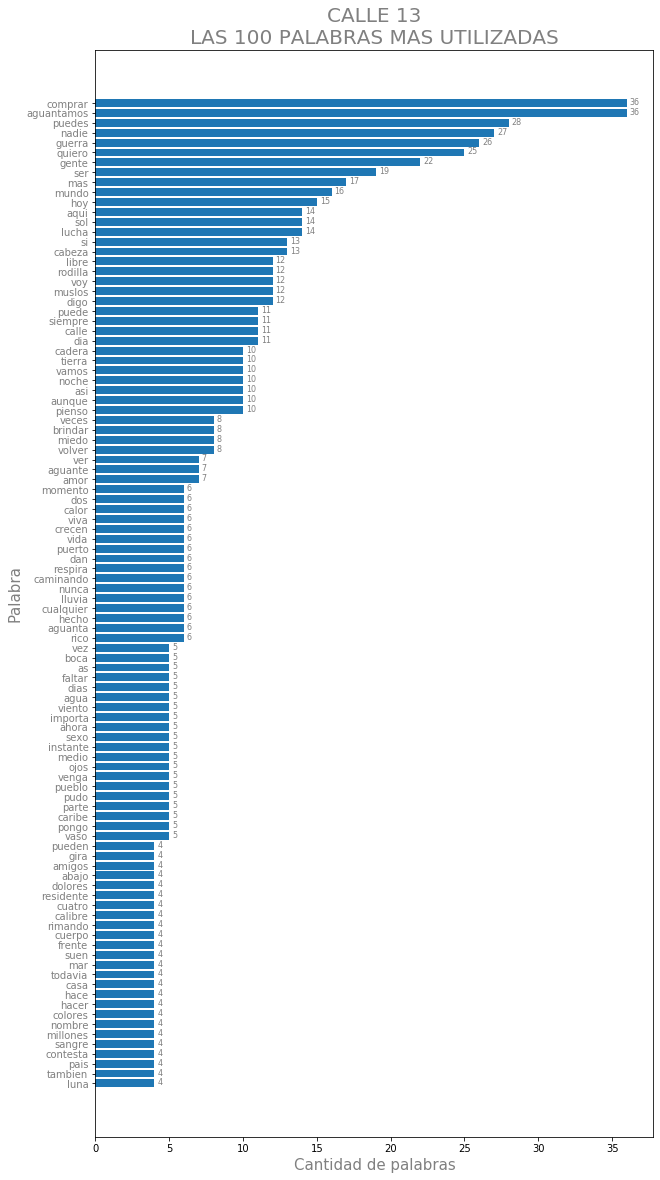

In [30]:
#Tamano del area de grafico
plt.figure(figsize=(10,20))
# Construccion de las barras
plt.barh(range(len(Las_100)), list(Las_100['Conteo']), align='center')
# Personalizacion del eje X
plt.yticks(range(len(Las_100)), list(Las_100['Palabra']),rotation=0, color = 'gray')
# Registrar el valor en cada barra
for index, value in enumerate(Las_100['Conteo']):
    plt.text(value+0.2, index-0.14, str(value), fontsize = 8, color = 'gray')

plt.title("CALLE 13\nLAS 100 PALABRAS MAS UTILIZADAS", fontsize=20, color = 'gray')
# Nombre del Eje X
plt.ylabel("Palabra", fontsize=15, color = 'gray')
# Nombre del Eje Y
plt.xlabel("Cantidad de palabras", fontsize=15, color = 'gray')
# Mostrar el grafico
plt.show()

In [31]:
Imagen_Web=urlopen("http://www.todolocool.com/wp-content/uploads/2014/02/calle-13-multi-viral.jpg")
Imagen_Web=np.array(Image.open(Imagen_Web))

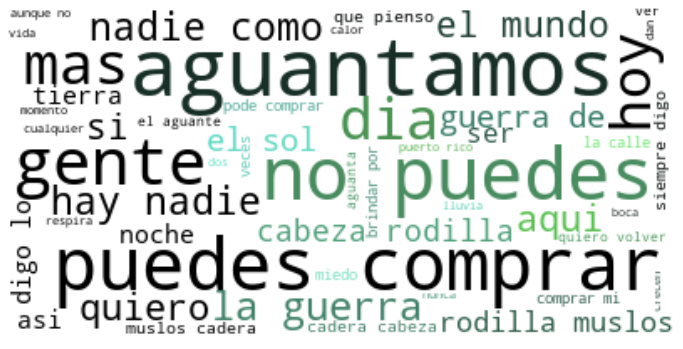

In [32]:
wordcloud = WordCloud(stopwords=My_Stop_Words, max_font_size=50, max_words=50, background_color="white").generate(Total_Canciones1.replace('\n',' '))
Colores_Imagen = ImageColorGenerator(Imagen_Web)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud.recolor(color_func=Colores_Imagen), interpolation="bilinear")
#plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Term Frecquency - Inverse Documente Frecquency

#### Mide con qué frecuencia aparece un término o frase dentro de un documento determinado, y lo compara con el número de documentos que mencionan ese  término dentro de una colección entera de documentos.

In [33]:
TF_IDF = TfidfVectorizer(stop_words=My_Stop_Words, analyzer='word', ngram_range=(1, 1), max_df=1.0, min_df=1, lowercase=True,max_features=None)

In [34]:
bag_of_words2 = TF_IDF.fit_transform(Total_Canciones)

In [35]:
print("Todas las palabras:\n{}".format(Contar_Vec.get_feature_names()))

Todas las palabras:
['abajo', 'abogados', 'abono', 'abrazos', 'abren', 'abriste', 'absoluta', 'absorbemos', 'abuela', 'aburrimiento', 'abusos', 'academia', 'academico', 'acariciandome', 'accidentales', 'aclimata', 'acobardar', 'activar', 'activen', 'actuar', 'acuerdense', 'adapta', 'adaptamos', 'adentro', 'adulto', 'afuera', 'agarrar', 'agarren', 'agente', 'agua', 'aguanta', 'aguantamos', 'aguantando', 'aguantar', 'aguantas', 'aguante', 'aguanteahora', 'aguanten', 'aguntamos', 'ah', 'ahi', 'ahoga', 'ahogandose', 'ahora', 'ahorcado', 'ahorcar', 'ahorro', 'ajo', 'ajusta', 'alboroto', 'alcalde', 'alcaldes', 'alcohol', 'alegraba', 'alegria', 'alegrias', 'aleman', 'algarrobas', 'algas', 'alguien', 'algun', 'alguna', 'alimento', 'alli', 'alma', 'alto', 'altura', 'alturas', 'alzan', 'amanece', 'amargos', 'america', 'amigo', 'amigos', 'amin', 'amor', 'ana', 'and', 'ando', 'animales', 'aniquela', 'anotandote', 'anticuerpos', 'anzuelos', 'apagaron', 'apellido', 'apesto', 'aprendi', 'aprendiendo'

In [36]:
print("Tamaño del vocabulario: {}".format(len(Contar_Train.vocabulary_)))
print("Asignación en la matriz:\n {}".format(Contar_Train.vocabulary_))

Tamaño del vocabulario: 1541
Asignación en la matriz:
 {'mensaje': 912, 'parte': 1067, 'residente': 1242, 'calle': 219, 'gobierno': 665, 'puertorriquen': 1178, 'danny': 409, 'metele': 923, 'ahi': 40, 'queridos': 1195, 'compatriotas': 323, 'abogados': 1, 'maestros': 861, 'alcaldes': 51, 'chotas': 277, 'doctores': 496, 'bichotes': 158, 'bomberos': 173, 'enfermeros': 533, 'contables': 344, 'traqueteros': 1422, 'piragueros': 1122, 'mundo': 975, 'entero': 538, 'madre': 858, 'hoy': 726, 'disfrazo': 489, 'machetero': 857, 'noche': 1007, 'voy': 1528, 'ahorcar': 45, 'diez': 474, 'marineros': 888, 'mano': 877, 'aniquela': 80, 'pela': 1078, 'voa': 1522, 'dar': 410, 'vean': 1461, 'gas': 653, 'bandera': 135, 'llenao': 836, 'meao': 898, 'murio': 976, 'desangrao': 443, 'gente': 656, 'nunca': 1019, 'arrodillao': 98, 'van': 1456, 'tener': 1389, 'enterrar': 539, 'parao': 1056, 'machete': 856, 'lao': 805, 'activen': 18, 'perla': 1099, 'lloren': 842, 'barbosa': 137, 'manuela': 879, 'caimito': 211, 'vista'

In [37]:
Vector_TF_IDF = pd.DataFrame(bag_of_words2.toarray())

In [38]:
Vector_TF_IDF[Vector_TF_IDF[0] != 0]

,0,1,2,3,4,5,6,7,8,9,...,1531,1532,1533,1534,1535,1536,1537,1538,1539,1540
20,0.331921,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
205,0.578476,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
566,0.415414,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
Vector_TF_IDF

,0,1,2,3,4,5,6,7,8,9,...,1531,1532,1533,1534,1535,1536,1537,1538,1539,1540
0,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.5,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [40]:
Vector_Conteo = pd.DataFrame(bag_of_words2.toarray())

In [41]:
print("El corpus cuenta con", len(Vector_TF_IDF), "frases y ", Vector_TF_IDF.columns.stop, "palabras diferentes")

El corpus cuenta con 771 frases y  1541 palabras diferentes


In [42]:
Las_100_palabras_mas_usadas_Calle_13_ = pd.DataFrame(Vector_TF_IDF.sum().sort_values(ascending= False)[0:100])
Las_100_ = Las_100_palabras_mas_usadas_Calle_13_
Las_100_['Relevancia']= Las_100_palabras_mas_usadas_Calle_13_

for i in range(100):
    Las_100_.iloc[i,0] = list(Contar_Train.vocabulary_.keys())[list(Contar_Train.vocabulary_.values()).index(Las_100_palabras_mas_usadas_Calle_13_.index[i])]
    #Las_25.iloc[i,1] = Las_25_palabras_mas_usadas_Calle_13.iloc[i, 0]
    i = i+1

Las_100_.columns = ['Palabra', 'Relevancia']
Las_100_ = Las_100_.sort_values(by = 'Relevancia')
Las_100_

,Palabra,Relevancia
962,mucha,1.866828
672,gracias,1.872981
1261,rezar,1.905925
1358,solo,1.920584
692,hace,1.949890
387,cuatro,1.952884
1042,oye,2.000000
967,muere,2.028912
43,ahora,2.031638
397,cuerpo,2.042627


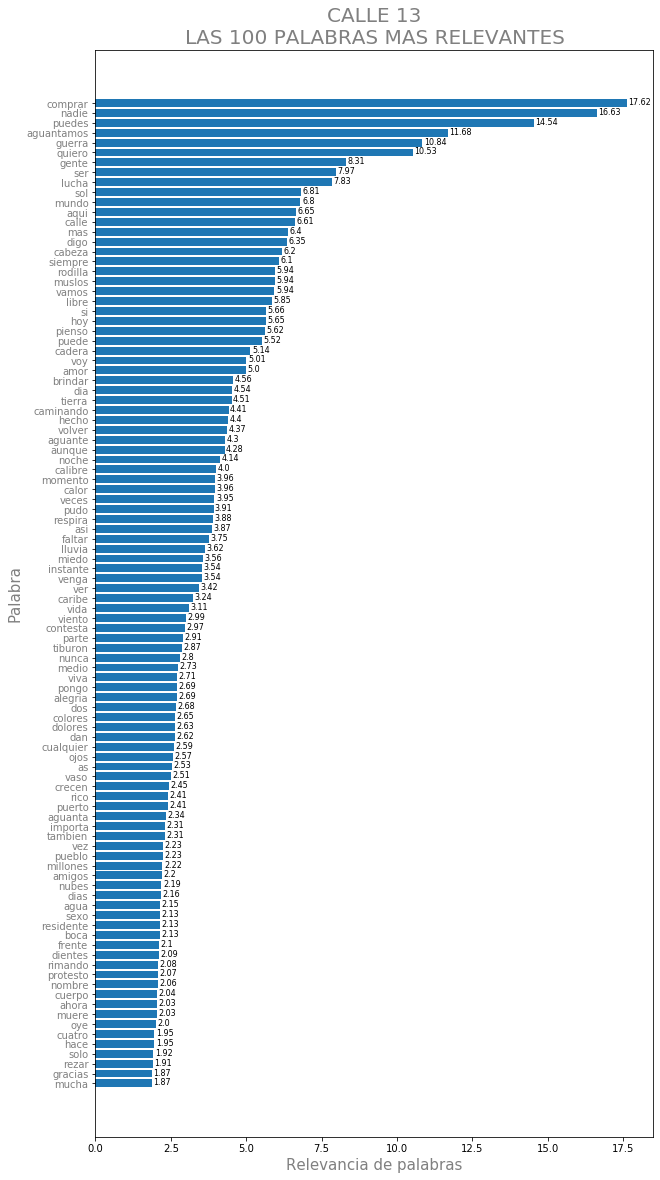

In [43]:
#Tamano del area de grafico
plt.figure(figsize=(10,20))
# Construccion de las barras
plt.barh(range(len(Las_100_)), list(Las_100_['Relevancia']), align='center')
# Personalizacion del eje X
plt.yticks(range(len(Las_100_)), list(Las_100_['Palabra']),rotation=0, color = 'gray')
# Registrar el valor en cada barra
for index, value in enumerate(round(Las_100_['Relevancia'], ndigits = 2) ):
    plt.text(value+0.05, index-0.14, str(value), fontsize = 8, color = 'black')

plt.title("CALLE 13\nLAS 100 PALABRAS MAS RELEVANTES", fontsize=20, color = 'gray')
# Nombre del Eje X
plt.ylabel("Palabra", fontsize=15, color = 'gray')
# Nombre del Eje Y
plt.xlabel("Relevancia de palabras", fontsize=15, color = 'gray')
# Mostrar el grafico
plt.show()

In [44]:
foto=urlopen("http://www.todolocool.com/wp-content/uploads/2014/02/calle-13-multi-viral.jpg")
fondo=np.array(Image.open(foto))

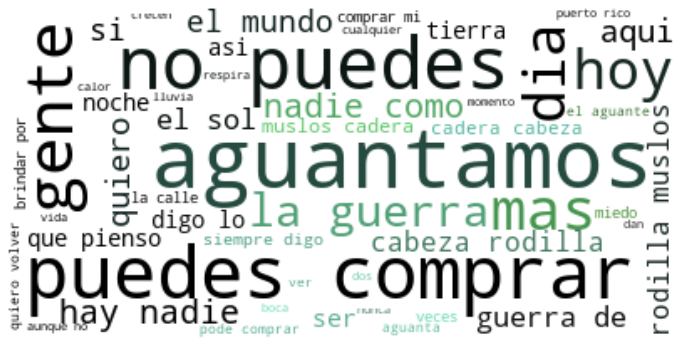

In [45]:
wordcloud = WordCloud(stopwords=My_Stop_Words, max_font_size=50, max_words=50, background_color="white").generate(Total_Canciones1)
image_colors = ImageColorGenerator(fondo)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
#plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [129]:
Total_Canciones1.replace('\n',' ')[25626:25750]

'no puedes comprar el viento tu no puedes comprar el sol tu no puedes comprar la lluvia tu no puedes comprar el calor tu no p'

In [126]:
re.search('no puedes',Total_Canciones1 )

<re.Match object; span=(25626, 25635), match='no puedes'>

In [128]:
Total_Canciones1[25626:25750]

'no puedes comprar el viento\ntu no puedes comprar el sol\ntu no puedes comprar la lluvia\ntu no puedes comprar el calor\ntu no p'

In [ ]:
Aplicar PCA
Graficar cada palabra
Transponer para que 
seaborn
plt